In [17]:
from skimage.io import imread, imsave
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import matplotlib as mpl

In [3]:
def flatten_img(img):
    x, y, c = img.shape
    return img.reshape((x * y, c))

(5000, 10000, 3)

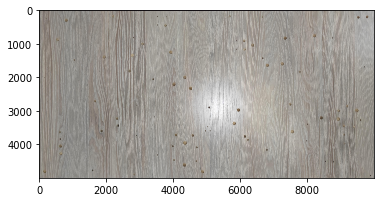

In [4]:
img = imread('res.jpg')
img_flatten = flatten_img(img)
plt.imshow(img)
img.shape

(5000, 10000)

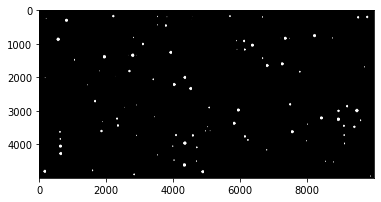

In [5]:
mask = imread('mask.png')
mask_flatten = (mask / 255).flatten()
plt.imshow(mask, cmap='gray')
mask.shape

In [6]:
mask_flatten.dtype

dtype('float64')

In [7]:
cloud_dsp = img_flatten[mask_flatten == 0.0]
cloud_dsp.shape

(49703337, 3)

In [8]:
cloud_veneer = img_flatten[mask_flatten == 1.0]
cloud_veneer.shape

(296663, 3)

In [9]:
cloud_dsp_uniq = np.unique(cloud_dsp, axis = 0)
cloud_dsp_uniq.shape

(19045, 3)

In [10]:
cloud_veneer_uniq = np.unique(cloud_veneer, axis = 0)
cloud_veneer_uniq.shape

(13781, 3)

In [11]:
cloud_dsp_uniq_transpose = cloud_dsp_uniq.transpose()
cloud_veneer_uniq_transpose = cloud_veneer_uniq.transpose()

/tmp/ipykernel_129283/2945275805.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-10, elev=-10)


<function matplotlib.pyplot.show(close=None, block=None)>

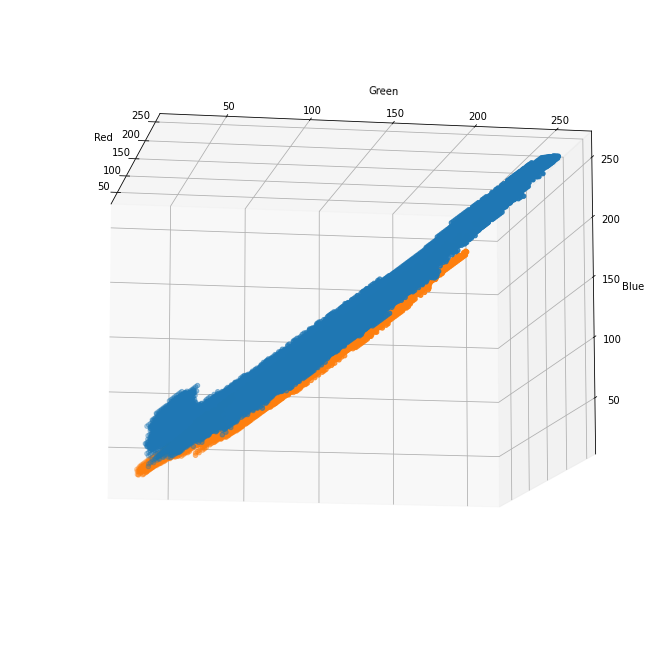

In [24]:
fig = plt.figure(figsize=(9, 9))
ax = Axes3D(fig, azim=-10, elev=-10)

ax.scatter(*cloud_dsp_uniq_transpose)
ax.scatter(* cloud_veneer_uniq_transpose)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')


plt.show